In [2]:
import pandas as pd #data manipulation
import numpy as np #maths+sats
import seaborn as sns #visualization;it is based in matplot
import matplotlib.pyplot as plt #visualization

In [4]:
orders =pd.read_csv('/content/Orders.csv')
customers =pd.read_csv('/content/Customers.csv')
restaurants =pd.read_csv('/content/Restaurants.csv')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 78.2+ KB


In [5]:
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])

In [6]:
orders['Month'] = orders['Order_Date'].dt.strftime('%B')
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June
...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March


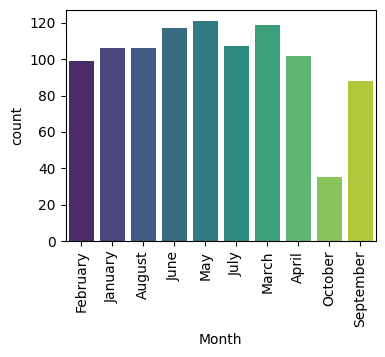

In [7]:
plt.figure(figsize=(4,3))#width,height
sns.countplot(x='Month',data=orders,hue= 'Month',palette='viridis')#palette for color to implement it we have to hue it;only one we can write color='red'
plt.xticks(rotation=90)#not to have the overlap values
plt.show()

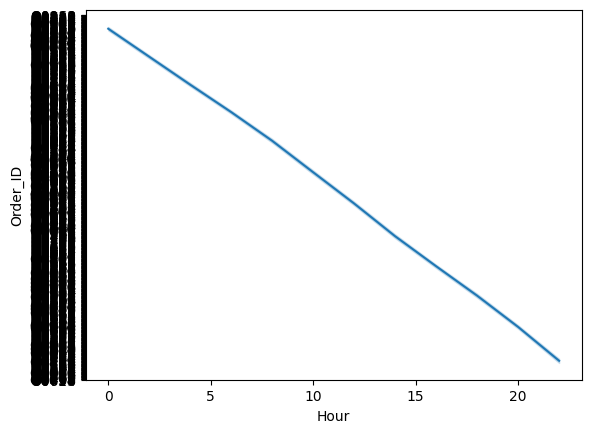

In [9]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour")
sns.lineplot(x = "Hour", y = "Order_ID", data = orders)
plt.show()

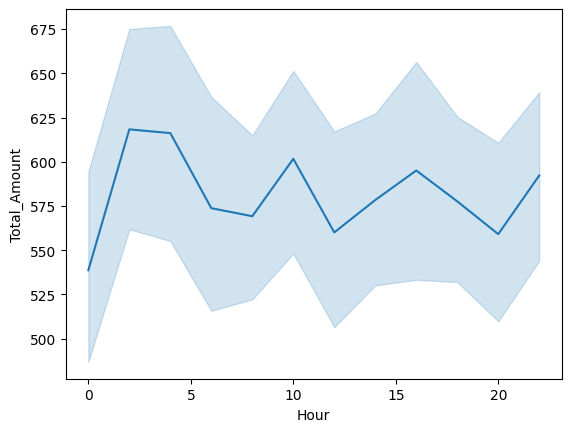

In [10]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour")
sns.lineplot(x = "Hour", y = "Total_Amount", data = orders)
plt.show()

In [11]:
df=pd.merge(left =orders,right=customers,on='Customer_ID',how='inner')
df

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0910,R022,2023-09-07 00:00:00,38,36,337.75,Completed,Cash,Garlic Naan,C127,September,0,Mumbai,26-35,3.4,Kabir Kapoor
1,O0864,R033,2023-04-12 00:00:00,31,52,577.09,Completed,Credit Card,Mutton Rogan Josh,C137,April,0,Bangalore,26-35,4.6,Kabir Kapoor
2,O0898,R091,2023-10-10 00:00:00,44,27,750.40,Completed,Cash,Veg Manchurian,C036,October,0,Delhi,26-35,4.2,Vivaan Khanna
3,O0567,R034,2023-03-30 00:00:00,28,42,822.38,Completed,Net Banking,Pasta Alfredo,C012,March,0,Mumbai,26-35,4.9,Ishaan Mehta
4,O0189,R042,2023-06-11 00:00:00,36,47,870.58,Completed,Credit Card,Margherita Pizza,C098,June,0,Chennai,46-55,3.0,Arjun Yadav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0944,R061,2023-10-08 22:00:00,39,33,728.74,Completed,Credit Card,Chole Bhature,C061,October,22,Pune,46-55,3.1,Mira Rao
996,O0619,R043,2023-09-22 22:00:00,33,49,862.66,Completed,Credit Card,Garlic Naan,C028,September,22,Bangalore,26-35,3.6,Ananya Desai
997,O0556,R081,2023-07-04 22:00:00,31,32,250.70,Completed,Credit Card,Paneer Butter Masala,C089,July,22,Pune,36-45,4.9,Vivaan Khanna
998,O0031,R082,2023-06-22 22:00:00,40,41,915.53,Cancelled,Net Banking,Veg Manchurian,C058,June,22,Mumbai,36-45,5.0,Arjun Yadav


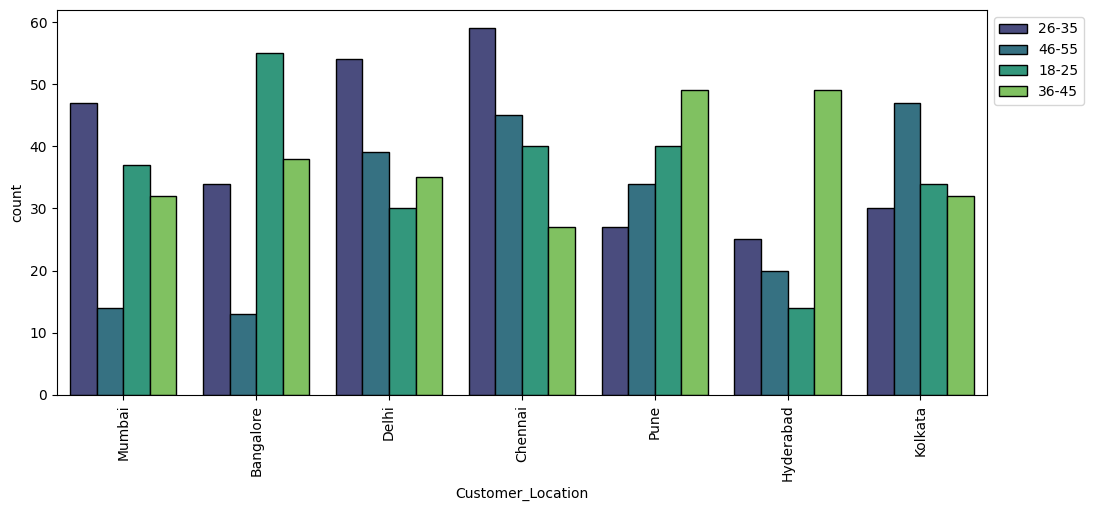

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Customer_Location',data=df,hue='Customer_Age_Group',palette='viridis', edgecolor='black')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [13]:
top_customers = df['Customer_Name'].value_counts().head(10)
print(top_customers)

Customer_Name
Dev Patel       74
Kavya Gupta     64
Diya Kapoor     64
Aryan Kumar     63
Arjun Yadav     61
Mira Rao        60
Ishaan Mehta    57
Isha Reddy      54
Riya Jain       54
Aanya Patel     53
Name: count, dtype: int64


<ipython-input-14-60116415f3ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='flare')


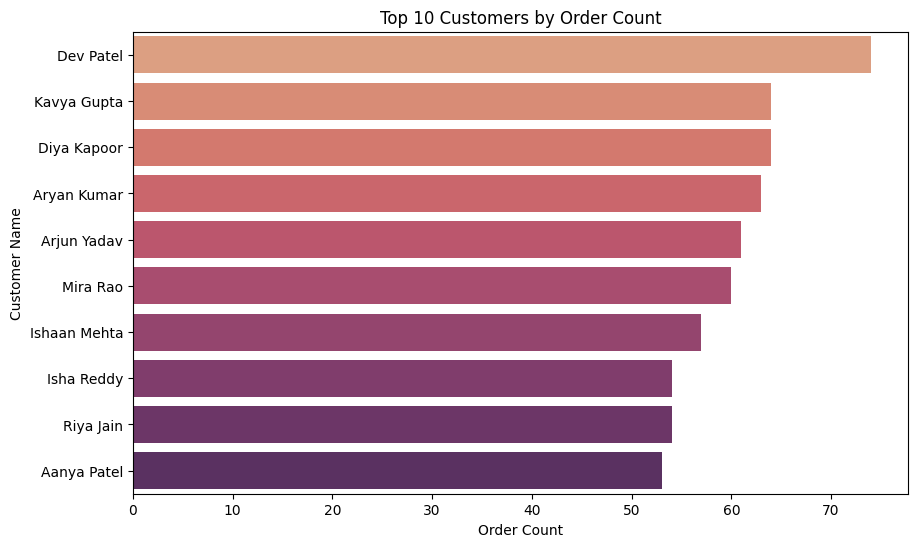

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='flare')
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Customer Name')
plt.show()

In [15]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_ID      100 non-null    object 
 1   Name               100 non-null    object 
 2   Location           100 non-null    object 
 3   Cuisine_Types      100 non-null    object 
 4   Avg_Cost_for_Two   100 non-null    int64  
 5   Ratings            100 non-null    float64
 6   Reviews_Count      100 non-null    int64  
 7   Operational_Hours  100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB
